# Getting started with data science in python: House Prices on Kaggle

This project has some really nice tutorials, and I will be borrowing heavily from them to get started.  I will also be incorporating additional material from Berkeley's CDIPs program tutorials, noted where possible.

My goal here is to translate knowledge from R into python first, then pick up some more advanced ML techniques.
Thus, I will be working with the boring but necessary data exploration steps first.  Useful but tangential approaches like gap-filling will be added to the notebook later, following exploration of ML fits.

My exploration begins based on the following tutorial: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
Here, I am transcribing by typing rather than forking or pasting to better commit commands and sytax to memory.

## Import libraries, data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [30]:
# import data and inspect contents
df_train = pd.read_csv('train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
# personally, I always like to peek
df_train.head(10) # skipped ahead

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Data distributions:  sns.distplot

Excecises here including looking at data distribution, and relationships with continuous and categorical variables.

In [32]:
# descriptive statistics
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

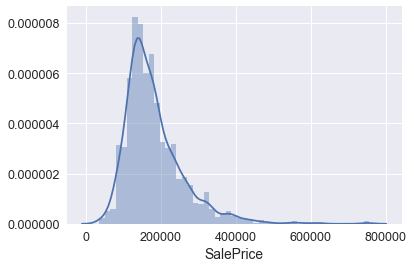

In [33]:
# look at sale price distribution, a bit skewed.
sns.distplot(df_train['SalePrice']);

In [34]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


 Data transformations and evaluation of normality with be shown following plotting excercises

## Bivariate plots: plot.scatter, sns.boxplots

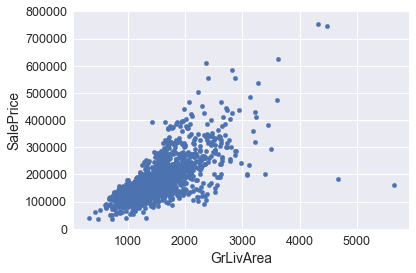

In [35]:
# Simple scatter plot, living area vs. sales price
var = 'GrLivArea'
dat = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)  
dat.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

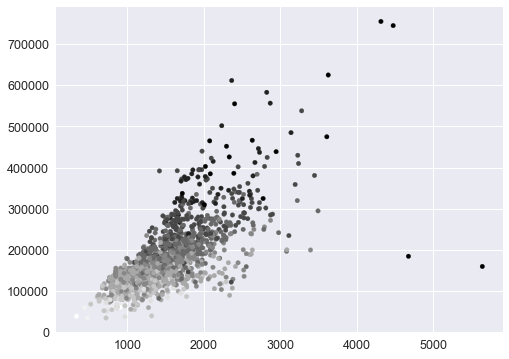

In [37]:
# Modified from CDIPs, data inspiration from below
plt.figure()
f, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df_train.GrLivArea, df_train.SalePrice, c=df_train.OverallQual, s=20)
# plt.scatter(x=df_train.GrLivArea, y=df_train.SalePrice, c=df_train.OverallQual, s=20)

# Why no legend?  and weak colors?
# label manually:
# plt.xlabel('Living area')
# plt.ylabel('Total Precipitation (inches)')
# plt.title('Precipitation Over Time')

Try previous method

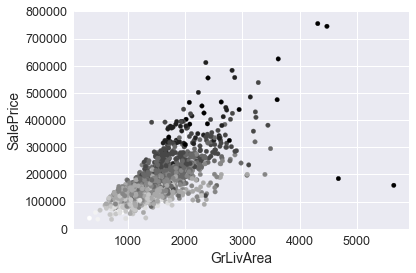

In [46]:
# looks same, but axes automatically labeled
dat = pd.concat([df_train['SalePrice'], df_train['GrLivArea'], df_train['OverallQual']], axis=1)  
dat.plot.scatter(x='GrLivArea', y='SalePrice', c=df_train.OverallQual, ylim=(0,800000))

# plt.legend()
# plt.savefig('px.pdf')

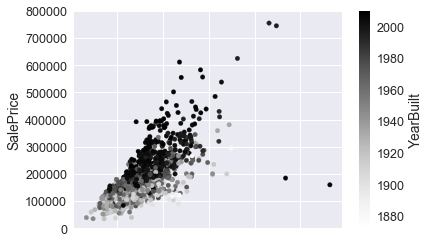

In [50]:
# Trying year built, but still black and white, scale is continuous
dat = pd.concat([df_train['SalePrice'], df_train['GrLivArea'], df_train['YearBuilt']], axis=1)  
dat.plot.scatter(x='GrLivArea', y='SalePrice', c='YearBuilt', ylim=(0,800000))


# plt.legend()
# plt.savefig('px.pdf')

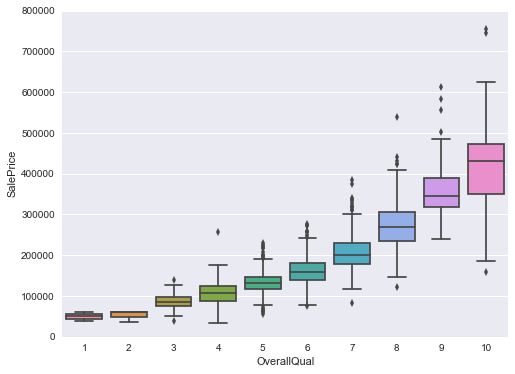

In [8]:
#box plots, overall quality vs. price
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))    # Nice but not necessary
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);          # Nice but not necessary

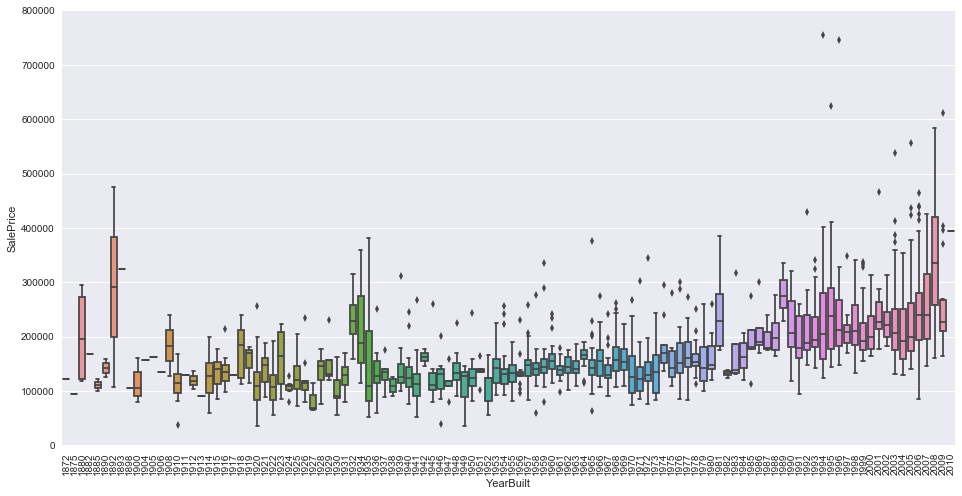

In [9]:
# Try year build, but why categorical??
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

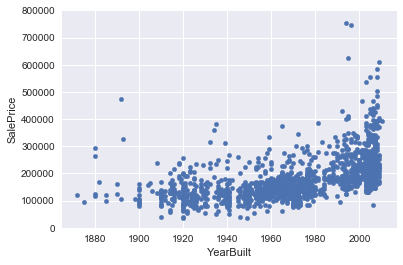

In [10]:
# Try year build, but TRY again as SCATTER
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

That's more my style, but I still need to hunt down how to color and shape points for different variables, which is definitely in the CDIPS materials.

## Multivariate summary plots

### scatterplot matrix panel graphs: sns.pairplot

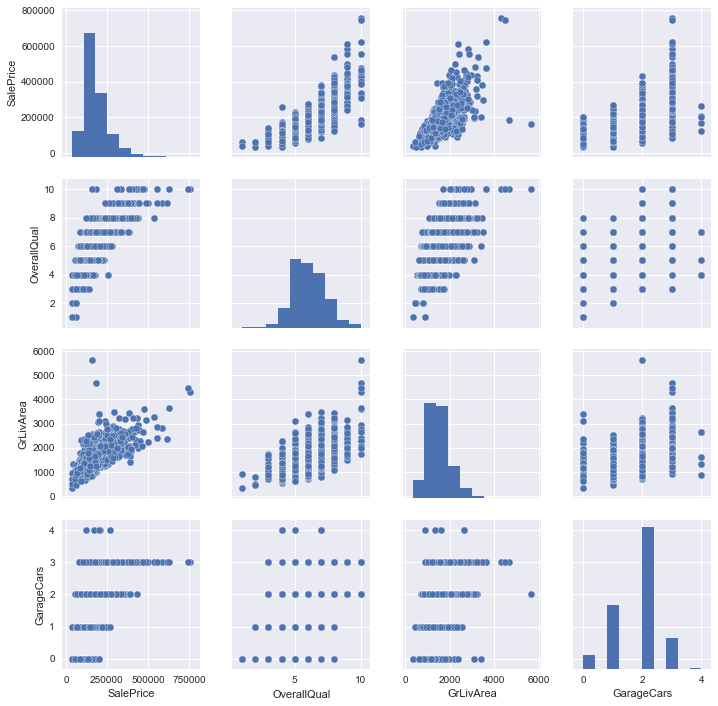

In [11]:
#scatterplot -- too many variables make this a bit of a headache, I cut some
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars'] #, 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

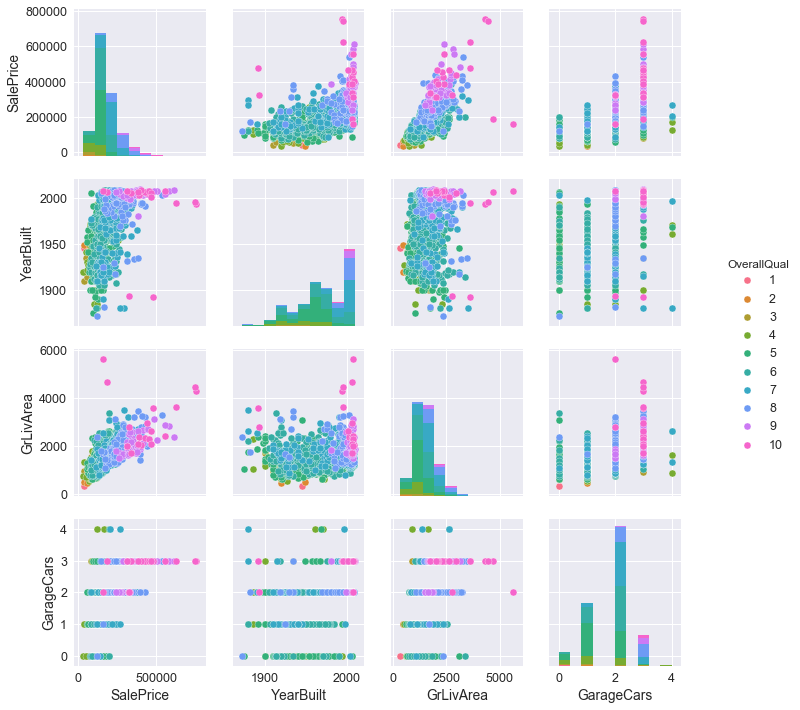

In [53]:
# Try this with color, using CDIPS code
# sns.pairplot(vars=['total_bill', 'tip', 'size'], hue='time', data=tips)
# plt.subplots_adjust(right=.85)

sns.pairplot(vars=['SalePrice', 'YearBuilt', 'GrLivArea', 'GarageCars'], hue='OverallQual', data=df_train)
plt.subplots_adjust(right=.85)


### Correlation matrix plots:  .corr() + sns.heatmap

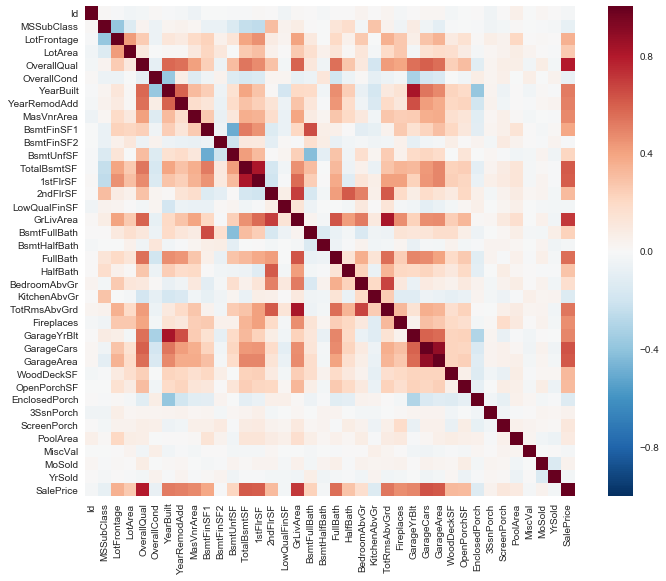

In [12]:
# heatmap style, does corr() filter by p-value?
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

## This looked a terrible mess after I added dummy variables.

### Filtered matrix: .nlargest,  np.corrcoeff

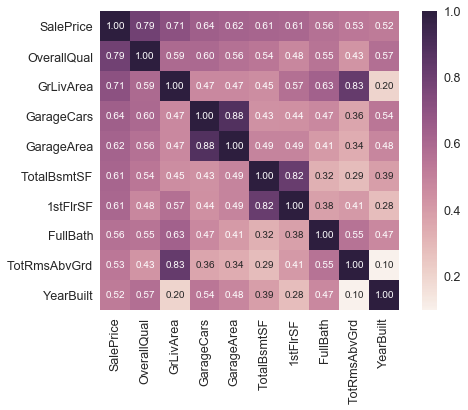

In [13]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

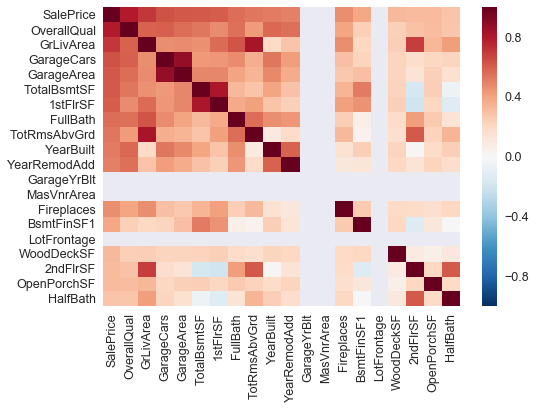

In [14]:
#### Redo original heatmap with filtered variables -- something is amiss here
k = 20 # number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index   # suspect call to order samples may be issue...
cm = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm, yticklabels=cols.values, xticklabels=cols.values)

### Try clustered heatmap from CDIPS tutorial: sns.clustermap
cm = sns.clustermap(data, col_cluster=False, vmin=-10, vmax=10)
plt.sca(cm.ax_heatmap) # More on this in a minute
plt.yticks(rotation=0);

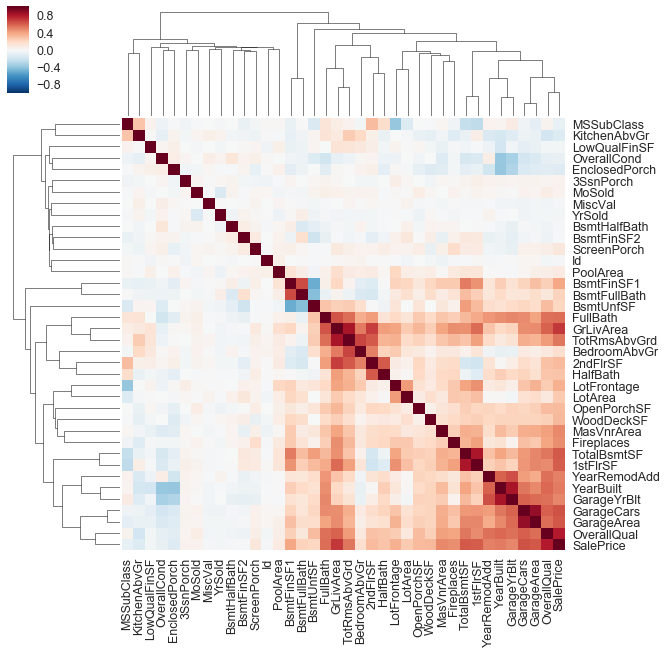

In [57]:
cm = sns.clustermap(corrmat, vmin=-1, vmax=1)
plt.sca(cm.ax_heatmap) # More on this in a minute
plt.yticks(rotation=0);

## Correcting data distributions: sns.distplot, stats.probplot

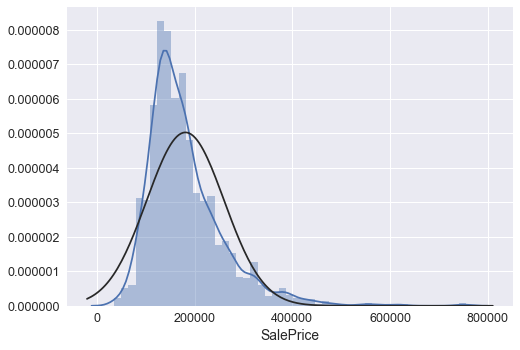

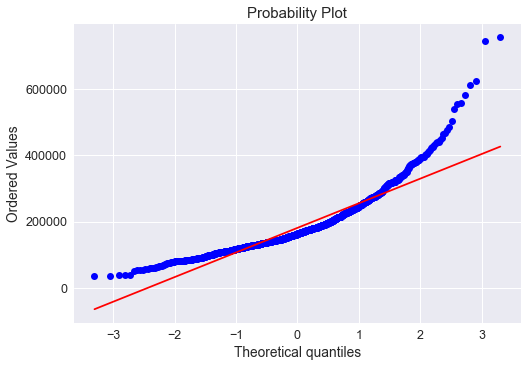

In [15]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [16]:
#applying log transformation  -- replacing original data
df_train['SalePrice'] = np.log(df_train['SalePrice'])

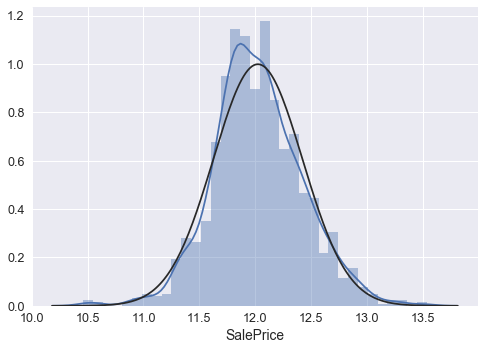

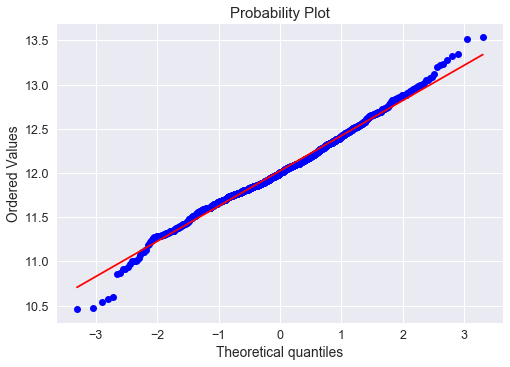

In [17]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [18]:
#convert categorical variable into dummy
# df_train = pd.get_dummies(df_train)